Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Impporting the dataset

In [2]:
df = pd.read_csv('Dataset/Mall_Customers.csv')

In [4]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


Training data

In [6]:
X = df.iloc[:,  [3,4]].values   #selecting the last two columns

Using the Dendrogram to determine the optimal number of clusters

SciPy library of python contains a function for hierarchial clustering called dendrogram which returns the dendrogram itself

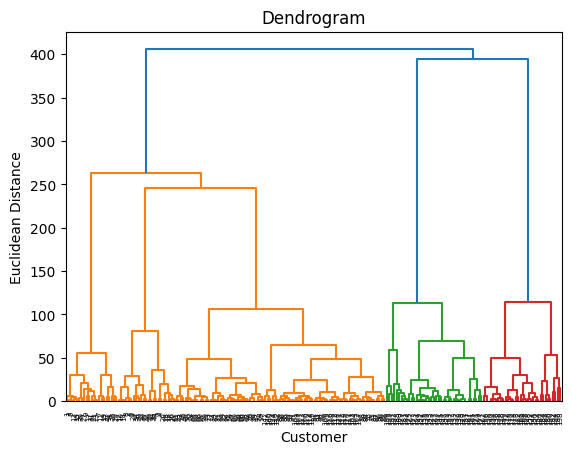

In [13]:
from scipy.cluster.hierarchy import dendrogram, linkage
dendro = dendrogram(linkage(X , method = 'ward'), orientation = 'top')
plt.title('Dendrogram')
plt.xlabel('Customer')  #observation points
plt.ylabel('Euclidean Distance')
plt.show()

Training the hierarchial clustering model

In [15]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=5, affinity = 'euclidean', linkage = 'ward')

In [17]:
hc_pred = clustering.fit_predict(X)

Visualising the clusters

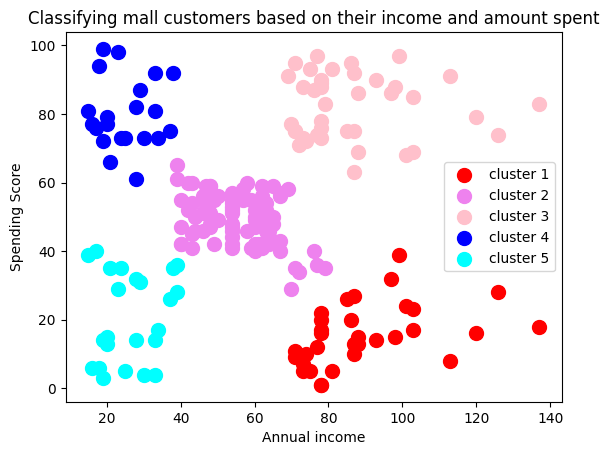

In [21]:
plt.scatter(X[hc_pred == 0, 0], X[hc_pred == 0, 1], s = 100, c = "red", label = 'cluster 1')
plt.scatter(X[hc_pred == 1, 0], X[hc_pred == 1, 1], s = 100, c = "violet", label = 'cluster 2')
plt.scatter(X[hc_pred == 2, 0], X[hc_pred == 2, 1], s = 100, c = "pink", label = 'cluster 3')
plt.scatter(X[hc_pred == 3, 0], X[hc_pred == 3, 1], s = 100, c = "blue", label = 'cluster 4')
plt.scatter(X[hc_pred == 4, 0], X[hc_pred == 4, 1], s = 100, c = "cyan", label = 'cluster 5')
plt.title("Classifying mall customers based on their income and amount spent")
plt.xlabel("Annual income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()